## Introduction - Deep Learning and Neural Networks with Python and Pytorch

In [2]:
import torch
x = torch.rand([3, 5])
print(x)


tensor([[0.3272, 0.2127, 0.7687, 0.9407, 0.0799],
        [0.7465, 0.6607, 0.9115, 0.0305, 0.8235],
        [0.7314, 0.2455, 0.7837, 0.6715, 0.3235]])


In [3]:
a = torch.Tensor([3, 3])
b = torch.Tensor([2, 1])

torch.set_printoptions(profile="ful", edgeitems=3)
print(a*b)

tensor([6., 3.])


In [4]:
z = torch.zeros([2,5])
print(z)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [5]:
z.shape

torch.Size([2, 5])

Fundamentally the pytorch lib is a library that allows us to do math on arrays (where tensors are just multi dimensional arrays)

### Working with Data

We will use the MNist Dataset as an example

In these examples we have datasets prepared for us, which removes the often most time consuming task of the process of training a model which is the preparing/labelling/organising of data



In [6]:
import torch
import torchvision
from torchvision import transforms, datasets

Next we will define our datasets.
We will split them into 2
- training 
- testing (out-of sample data)

This is so we don't overfit

In [7]:
train = datasets.MNIST("", train=True, download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))

train = datasets.MNIST("", train=False, download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))

### Batching
We batch for 2 reasons:
 1. Often times we will have large datasets and 
    not all the data can fit in memory at once

 2. We hope the data will generalize
    Remove chance of data not generalising.
    If you pass your whole data set at once, your machine
    is more likely to pickup a bias 

In [8]:

##  common batch sizes are 8 - 64
trainSet = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testSet = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

In [9]:
for data in trainSet:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [10]:
# data contains two tensors
# 1st index: Tensor of Tensors of image data
# 2nd index: Tensor of labels
x,y = data[0][0], data[1][0]

print(y)

tensor(2)


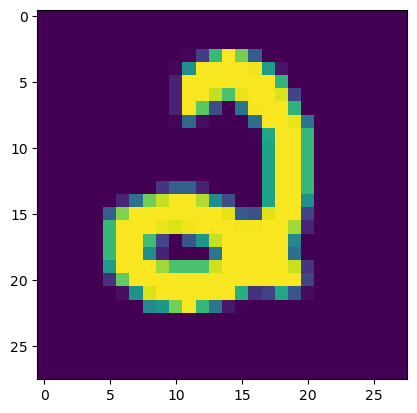

In [11]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))

In [15]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainSet:
  xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total+=1

print("The following two prints show us the percentage distribution of the training set")
print(counter_dict)

for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total * 100}")

The following two prints show us the percentage distribution of the training set
{0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}
0: 9.8
1: 11.35
2: 10.32
3: 10.100000000000001
4: 9.82
5: 8.92
6: 9.58
7: 10.280000000000001
8: 9.74
9: 10.09


In [16]:
import torch.nn as nn
import torch.nn.functional as F

In [18]:
class Net(nn.Module):
  def __init__(self) -> None:
    # this will call the init method of nn Module
    super().__init__()
    # here we will setup our layers
    # fc stands for fully connected
    inputFeatureCount = 28*28; # because our images are 28px squared
    self.fc1 =nn.Linear(inputFeatureCount, 64)
    self.fc2 =nn.Linear(64, 64)
    self.fc3 =nn.Linear(64, 64)
    self.fc4 =nn.Linear(64, 10)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
